In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def draw(x1, x2):
    ln = plt.plot(x1, x2)
    
def sigmoid(score):
    return 1 / (1 + np.exp(score))

def calculate_error(line_parameters, points, y):
    # The probability of each point being in the line's positive region, is the sigmoid of the linear combination of our points.
    # Linear combination can be taken by matrix multiplication.
    # To make the matrix multiplication between the all_points and line_parameters possible, the line_parameters will be transposed.
    linear_combination = points * line_parameters  # linear_combination is the score for each point (distance to the line)

    # To obtain the probability, we need to calculate the sigmoid of linear_combination
    p = sigmoid(linear_combination)  # Probability of each point being in the positive region. Positive region corresponds to probability > 0.5 and negative regions to < 0.5
    
    m = points.shape[0]  # Number of points
    
    cross_entropy = -(1/m) * (np.log(p).T * y + np.log(1-p).T*(1-y))  # Cross Entropy
    return cross_entropy

In [11]:
n_pts = 100  # Number of points
np.random.seed(0)  # Make sure that whenever we run our code, we get repeatable results. To do that, we must seed our random generator
bias = np.ones(n_pts)  # Bias value of the linear model
# np.random.normal(a, b, n_pts) returns an array of n_pts random noramlly distributed values with the center of distribution of "a" and standard deviation of "b"
top_region = np.array([np.random.normal(10, 2, n_pts), np.random.normal(12, 2, n_pts), bias]).T  # Transpose to have both horizontal and vertical values in the same row
bottom_region = np.array([np.random.normal(5, 2, n_pts), np.random.normal(6, 2, n_pts), bias]).T
all_points = np.vstack((top_region, bottom_region))  # Stack the top_region array on top of bottom+region array

# A random line as our model
w1 = -0.2
w2 = -0.35
b = 3.5  # Bias
line_parameters = np.matrix([w1, w2, b]).T  # Transposed to make matrix multiplication with all_points possible
# Coordinates of the line. From the most left to the most right point
# The most left point in the bottom: bottom_region[:, 0].min()
# The most right point in the top: top_region[:, 0].max()
x1 = np.array([bottom_region[:, 0].min(), top_region[:, 0].max()])
x2 = -b / w2 + x1 * (-w1 / w2)  # w1x1 + w2x2 + b = 0 ==> x2 = -b / w2 + x1 * (-w1 / w2)

# We set the value of 0 for the top region (the first half of the all_points as the top_region array was in the top of the stack) and 1 for the botoom region
y = np.array([np.zeros(n_pts), np.ones(n_pts)]).reshape(n_pts * 2, 1)  # Reshaped to be compatible for matrix multiplication

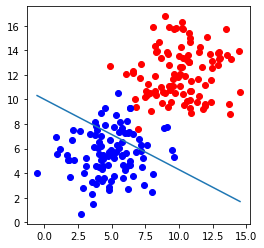

In [12]:
_, ax = plt.subplots(figsize=(4, 4))  # plt.subplots() Allows us to draw mutliple plots in the same figure and returns a tuple which we have unpacked it here to _ and ax
ax.scatter(top_region[:, 0], top_region[:, 1], color='r')
ax.scatter(bottom_region[:, 0], bottom_region[:, 1], color='b')
draw(x1, x2)
plt.show()

In [13]:
print((calculate_error(line_parameters, all_points, y)))

[[1.97278605]]
